Results for linear SVM
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Results for SVM with RBF kernel
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Results for tuned SVM
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       1

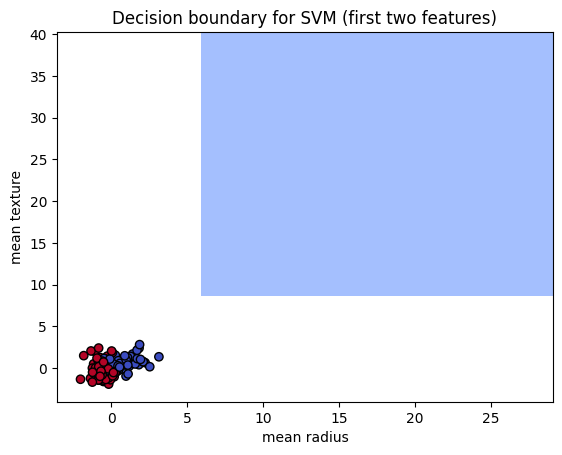

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


data = load_breast_cancer()
features = data.data
labels = data.target
feature_names = data.feature_names


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


linear_model = SVC(kernel='linear', C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)
linear_predictions = linear_model.predict(X_test_scaled)


rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf_model.fit(X_train_scaled, y_train)
rbf_predictions = rbf_model.predict(X_test_scaled)


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_predictions = grid_search.predict(X_test_scaled)


print("Results for linear SVM")
print(classification_report(y_test, linear_predictions))
print("Results for SVM with RBF kernel")
print(classification_report(y_test, rbf_predictions))
print("Results for tuned SVM")
print(classification_report(y_test, best_predictions))
print("Best hyperparameters found:", grid_search.best_params_)


cv_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())


X_vis = features[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, labels, test_size=0.2, random_state=42)
scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)

model_vis = SVC(kernel='rbf', C=1.0, gamma='scale')
model_vis.fit(X_train_vis_scaled, y_train_vis)

h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test_vis_scaled[:, 0], X_test_vis_scaled[:, 1], c=y_test_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Decision boundary for SVM (first two features)")
plt.show()
